In [1]:
# xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx #
# xxxxxxxxxxxxxxxxxxxxxxx---------------Visualising The ZTF Input Data----------------------xxxxxxxxxxxxxxxxxxxxxxxxx #
# xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx #


# ------------------------------------------------------------------------------------------------------------------- #
# Import Modules
# ------------------------------------------------------------------------------------------------------------------- #
import os
import numpy as np
import pandas as pd
from astropy.time import Time
from datetime import date, timedelta

import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.ticker import MultipleLocator
from matplotlib.dates import DateFormatter, MonthLocator, DayLocator
# ------------------------------------------------------------------------------------------------------------------- #


# ------------------------------------------------------------------------------------------------------------------- #
# Initialize Variables & Directories
# ------------------------------------------------------------------------------------------------------------------- #
epoch_mjd = 2400000.5

survey_file = "df_sim_stats_full.p"
DIR_Data = "/data/cfremling/simsurvey/notebooks"
# ------------------------------------------------------------------------------------------------------------------- #


# ------------------------------------------------------------------------------------------------------------------- #
# Functions To Convert Julian Date Into Calendar Date In String Format & Vice Versa
# ------------------------------------------------------------------------------------------------------------------- #

def jd_to_cald(julian_day):
    """
    Converts julian day into calendar day in string format.
    Args:
        julian_day  : Julian day value to be converted to calendar day
    Returns:
        cal_date    : Calendar date corresponding to input julian day
    """
    cal_date = Time(julian_day, format='jd').iso
    return cal_date


def cald_to_jd(cal_date):
    """
    Converts calendar date into julian day.
    Args:
        cal_date    : Calendar date to be converted to julian day
    Returns:
        julian_day  : Julian day corresponding to the input calendar date
    """
    julian_day = cal_date(julian_day, format='datetime').jd
    return julian_day

# ------------------------------------------------------------------------------------------------------------------- #


In [2]:
# ------------------------------------------------------------------------------------------------------------------- #
# Read the Raw ZTF Input Data
# ------------------------------------------------------------------------------------------------------------------- #
raw_df = pd.read_pickle(os.path.join(DIR_Data, survey_file))
JD_min = raw_df['jd'].min()
JD_max = raw_df['jd'].max()

# raw_df['month'] = raw_df['jd'].apply(lambda x: Time(x, format='jd').datetime.replace(day=1))

print ("Size of Raw Input DataFrame: {0} x {1}\n".format(raw_df.shape[0], raw_df.shape[1]))
print ("ZTF JD_span : {0:0.7f} days".format(JD_max - JD_min))
print ("ZTF JD_start : {0:0.7f} [{1}]\nZTF JD_end : {2:0.7f} [{3}]".format(JD_min, jd_to_cald(JD_min), JD_max, jd_to_cald(JD_max)))
# ------------------------------------------------------------------------------------------------------------------- #

Size of Raw Input DataFrame: 5338605 x 10

ZTF JD_span : 597.8914120 days
ZTF JD_start : 2458197.8162153 [2018-03-20 07:35:21.002]
ZTF JD_end : 2458795.7076273 [2019-11-08 04:58:58.999]


In [3]:
# # ------------------------------------------------------------------------------------------------------------------- #
# # Isolate Unique Monthly ZTF Pointings
# # ------------------------------------------------------------------------------------------------------------------- #
# pointings_df = pd.DataFrame(columns=['jd_start', 'jd_end', 'pointings'])
# print ("Number of Unique pointings\n")

# JD_range = np.arange(JD_min, JD_max, 30)#; print (JD_range)
# for index in range(0, len(JD_range)):
#     if index != len(JD_range) - 1:
#         filter_df = raw_df[(raw_df['jd'] >= JD_range[index]) & (raw_df['jd'] < JD_range[index + 1])]
#         filter_df = filter_df.drop_duplicates(subset='expid', keep='first')
#         filter_df = filter_df.groupby('fieldid').filter(lambda x: len(x) > 9)
#         filter_df = filter_df.drop_duplicates(subset='fieldid', keep='first')
#         pointings_df.loc[index] = [JD_range[index], JD_range[index + 1], len(filter_df)]
#         print (str(index + 1) + ')', 'JD', JD_range[index], 'to', JD_range[index + 1], ':', len(filter_df))

# pointings_df['jd_mean'] = (pointings_df['jd_start'] + pointings_df['jd_end']) / 2
# pointings_df['date_mean'] = pointings_df['jd_mean'].apply(lambda x: Time(x, format='jd').datetime)

# print ("\nAverage Monthly Unique Pointings: {0:0.2f}\n".format(pointings_df['pointings'].mean()))
# # ------------------------------------------------------------------------------------------------------------------- #


# # ------------------------------------------------------------------------------------------------------------------- #
# # Plot the Unique Pointings as a function of the Mean JD
# # ------------------------------------------------------------------------------------------------------------------- #

# fig = plt.figure(figsize=(16, 10))
# ax = fig.add_subplot(111)

# ax.xaxis.set_ticks_position('both')
# ax.yaxis.set_ticks_position('both')
# ax.yaxis.set_major_locator(MultipleLocator(50))
# ax.yaxis.set_minor_locator(MultipleLocator(5))
# ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))
# ax.xaxis.set_major_locator(MonthLocator())
# ax.xaxis.set_minor_locator(DayLocator(interval=3))

# ax.tick_params(axis='both', which='major', direction='in', width=1.4, length=8, labelsize=16)
# ax.tick_params(axis='both', which='minor', direction='in', width=0.8, length=5, labelsize=16)

# ax.grid(True, which='major', linestyle='-', lw=1)
# ax.set_xlabel('Mean Date', fontsize=18)
# ax.set_ylabel('Unique Pointings', fontsize=18)
# ax.set_title('Average Unique Monthly Pointings [Minimum Pointings > 9]', fontsize=20)
# ax.plot(pointings_df['date_mean'], pointings_df['pointings'], ls='--', lw=2, c='k', 
#            markerfacecolor='orange', marker='*', ms=20)

# fig.autofmt_xdate()
# fig.savefig('PLOT_ZTFUniquePointings_MonthScatter.pdf', format='pdf', dpi=2000, bbox_inches='tight')
# plt.show()
# plt.close(fig)
# # ------------------------------------------------------------------------------------------------------------------- #

In [4]:
# x = 2456780.02
# print (Time(x, format='jd').datetime)
# %timeit print (Time(x, format='jd').datetime.replace(day=1))
# 267 * 1e-6 * 5338605

In [5]:
# ------------------------------------------------------------------------------------------------------------------- #
# Isolate Unique 3 Day ZTF Pointings
# ------------------------------------------------------------------------------------------------------------------- #
pointings_df = pd.DataFrame(columns=['jd_start', 'jd_end', 'pointings'])
# print ("Number of Unique pointings\n")

JD_range = np.arange(JD_min, JD_max, 3)#; print (JD_range)
for index in range(0, len(JD_range)):
    if index != len(JD_range) - 1:
        filter_df = raw_df[(raw_df['jd'] >= JD_range[index]) & (raw_df['jd'] < JD_range[index + 1])]
        filter_df = filter_df.drop_duplicates(subset='expid', keep='first')
        filter_df = filter_df.drop_duplicates(subset='fieldid', keep='first')
        pointings_df.loc[index] = [JD_range[index], JD_range[index + 1], len(filter_df)]
#         print (str(index + 1) + ')', 'JD', JD_range[index], 'to', JD_range[index + 1], ':', len(filter_df))

pointings_df['jd_mean'] = (pointings_df['jd_start'] + pointings_df['jd_end']) / 2
pointings_df['date_mean'] = pointings_df['jd_mean'].apply(lambda x: Time(x, format='jd').datetime)
mean_pointings = pointings_df['pointings'].mean()

print ("Average 3 Day Unique Pointings: {0:0.2f}".format(mean_pointings))
# ------------------------------------------------------------------------------------------------------------------- #

Average 3 Day Unique Pointings: 243.88


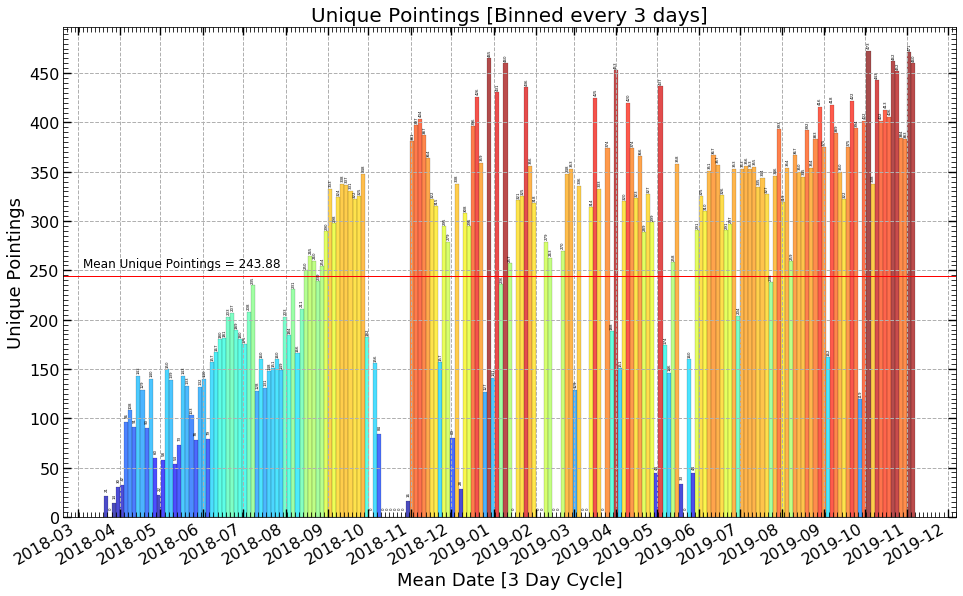

In [16]:
# ------------------------------------------------------------------------------------------------------------------- #
# Plot the Unique Pointings as a function of the Mean JD
# ------------------------------------------------------------------------------------------------------------------- #
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111)

# cmap = cm.get_cmap('icefire_r')
cmap = cm.get_cmap('jet')
cmap_range = Normalize(vmin=pointings_df['pointings'].min(), vmax=pointings_df['pointings'].max())

ax.bar(pointings_df['date_mean'], pointings_df['pointings'], width=3, edgecolor='k', lw=0.2,
       color=cmap(cmap_range(pointings_df['pointings'].values)), alpha=0.7)
# ax.bar(pointings_df['date_mean'], pointings_df['pointings'], width=3,
#        color=sns.color_palette('rocket', int(len(JD_range) * 1.2)))
ax.axhline(mean_pointings, ls='-', lw=1, c='r')
ax.text(y=mean_pointings + 10, x=Time(pointings_df['jd_start'].min(), format='jd').datetime - timedelta(days=15), 
        s='Mean Unique Pointings = {0:0.2f}'.format(mean_pointings), fontsize=12)

for index, value in enumerate(pointings_df['pointings']):
    ax.text(pointings_df.loc[index, 'date_mean'] - timedelta(days=1.1), value + 7, str(int(value)), color='k', 
            fontsize=4, rotation=90)

ax.xaxis_date()
ax.grid(True, which='major', ls='--', lw=1)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
ax.yaxis.set_major_locator(MultipleLocator(50))
ax.yaxis.set_minor_locator(MultipleLocator(5))
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_minor_locator(DayLocator(interval=3))
ax.tick_params(axis='both', which='major', direction='in', width=1.4, length=8, labelsize=16)
ax.tick_params(axis='both', which='minor', direction='in', width=0.8, length=5, labelsize=16)

ax.set_xlabel('Mean Date [3 Day Cycle]', fontsize=18)
ax.set_ylabel('Unique Pointings', fontsize=18)
ax.set_title('Unique Pointings [Binned every 3 days]', fontsize=20)

# divider = make_axes_locatable(ax)
# cax = divider.append_axes('right', size='5%', pad=0.05)
# sm = cm.ScalarMappable(cmap, cmap_range)
# sm.set_array([])

fig.autofmt_xdate()
# fig.colorbar(sm, ax=ax, orientation='vertical')
fig.savefig('PLOT_ZTFUniquePointings_3DayBarV.pdf', format='pdf', dpi=2000, bbox_inches='tight')
plt.show()
plt.close(fig)
# ------------------------------------------------------------------------------------------------------------------- #

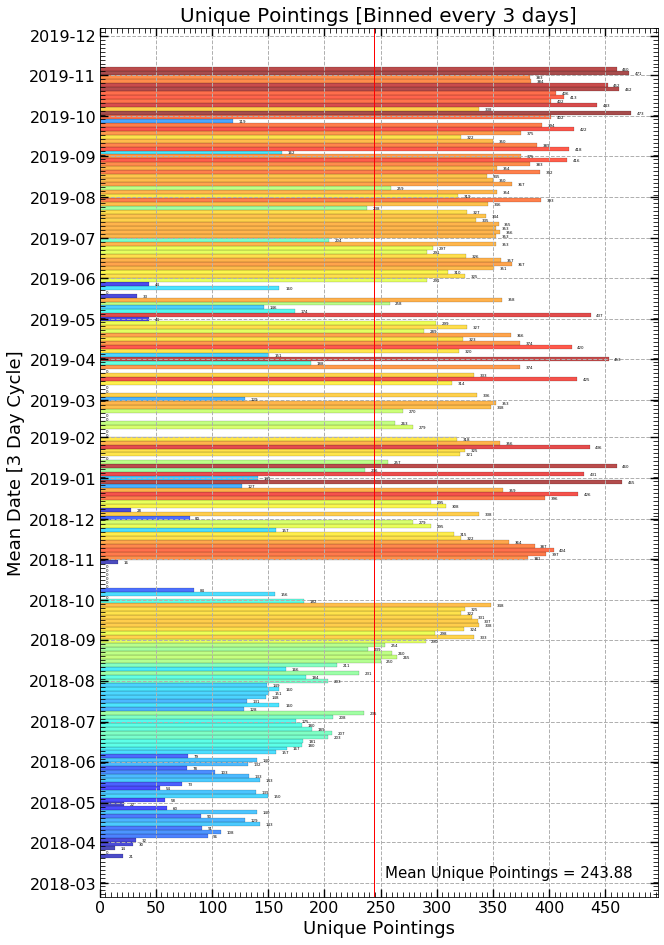

In [14]:
# ------------------------------------------------------------------------------------------------------------------- #
# Plot the Unique Pointings as a function of the Mean JD
# ------------------------------------------------------------------------------------------------------------------- #
fig = plt.figure(figsize=(10, 16))
ax = fig.add_subplot(111)

ax.barh(pointings_df['date_mean'], pointings_df['pointings'], height=3, edgecolor='k', lw=0.2,
       color=cmap(cmap_range(pointings_df['pointings'].values)), alpha=0.7)
# ax.barh(pointings_df['date_mean'], pointings_df['pointings'], height=3,
#         color=sns.color_palette('rocket', int(len(JD_range) * 1.2)))

ax.axvline(mean_pointings, ls='-', lw=1, c='r')
ax.text(x=mean_pointings + 10, y=Time(pointings_df['jd_start'].min(), format='jd').datetime - timedelta(days=15), 
        s='Mean Unique Pointings = {0:0.2f}'.format(mean_pointings), fontsize=15)

for index, value in enumerate(pointings_df['pointings']):
    ax.text(value + 5, pointings_df.loc[index, 'date_mean'] - timedelta(days=1), str(int(value)), color='k', 
            fontsize=4)
    
ax.yaxis_date()
ax.grid(True, which='major', ls='--', lw=1)
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.xaxis.set_major_locator(MultipleLocator(50))
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.yaxis.set_major_formatter(DateFormatter('%Y-%m'))
ax.yaxis.set_major_locator(MonthLocator())
ax.yaxis.set_minor_locator(DayLocator(interval=3))
ax.tick_params(axis='both', which='major', direction='in', width=1.4, length=8, labelsize=16)
ax.tick_params(axis='both', which='minor', direction='in', width=0.8, length=5, labelsize=16)

ax.set_ylabel('Mean Date [3 Day Cycle]', fontsize=18)
ax.set_xlabel('Unique Pointings', fontsize=18)
ax.set_title('Unique Pointings [Binned every 3 days]', fontsize=20)

fig.savefig('PLOT_ZTFUniquePointings_3DayBarH.pdf', format='pdf', dpi=2000, bbox_inches='tight')
plt.show()
plt.close(fig)
# ------------------------------------------------------------------------------------------------------------------- #

In [8]:
Time(raw_df.sort_values('jd').loc[2645, 'jd'], format='jd').datetime - timedelta(hours=8)

datetime.datetime(2018, 3, 19, 23, 35, 21, 1920)